In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


## Q1

In [14]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/filings/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)
ipo_dfs

[      Filing Date Symbol                           Company Name  \
 0    Apr 29, 2024   HWEC                   HW Electro Co., Ltd.   
 1    Apr 29, 2024   DTSQ  DT Cloud Star Acquisition Corporation   
 2    Apr 26, 2024   EURK                Eureka Acquisition Corp   
 3    Apr 26, 2024    HDL    Super Hi International Holding Ltd.   
 4    Apr 22, 2024   DRJT                        Derun Group Inc   
 ..            ...    ...                                    ...   
 321  Jan 21, 2020   GOXS                            Goxus, Inc.   
 322  Jan 21, 2020   UTXO                 UTXO Acquisition, Inc.   
 323   Dec 9, 2019   LOHA                           Loha Co. Ltd   
 324   Oct 4, 2019   ZGHB  China Eco-Materials Group Co. Limited   
 325  Dec 27, 2018   FBOX              Fit Boxx Holdings Limited   
 
         Price Range Shares Offered  
 0             $3.00        3750000  
 1            $10.00        6000000  
 2            $10.00        5000000  
 3                 -          

In [15]:
ipos_filing = ipo_dfs[0]


ipos_filing['Filing Date'] = pd.to_datetime(ipos_filing['Filing Date'])
ipos_filing['Shares Offered'] = ipos_filing['Shares Offered'].replace('-', np.nan).astype(float)
ipos_filing.info()



def calculate_average_price(price_range):
    if '-' in price_range:
        prices = price_range.replace('$', '').split('-')
        prices = [float(price) for price in prices if price.strip()]  # Filter out empty strings
        return np.mean(prices) if prices else np.nan  # Check if prices list is not empty
    elif price_range != '-':
        return float(price_range.replace('$', ''))
    else:
        return np.nan


# Apply function to create 'Average Price' column
ipos_filing['Average Price'] = ipos_filing['Price Range'].apply(calculate_average_price)


ipos_filing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Filing Date     326 non-null    datetime64[ns]
 1   Symbol          326 non-null    object        
 2   Company Name    326 non-null    object        
 3   Price Range     326 non-null    object        
 4   Shares Offered  253 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 12.9+ KB


,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Average Price
0,2024-04-29,HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0,3.00
1,2024-04-29,DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0,10.00
2,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000.0,10.00
3,2024-04-26,HDL,Super Hi International Holding Ltd.,-,NaN,NaN
4,2024-04-22,DRJT,Derun Group Inc,$5.00,NaN,5.00
...,...,...,...,...,...,...
321,2020-01-21,GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000.0,9.00
322,2020-01-21,UTXO,"UTXO Acquisition, Inc.",$10.00,5000000.0,10.00
323,2019-12-09,LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000.0,9.00
324,2019-10-04,ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000.0,4.00


In [220]:
filtered_df = ipos_filing[(ipos_filing['Filing Date'].dt.year == 2023) & (ipos_filing['Filing Date'].dt.day_name() == 'Friday')]

def calculate_total(row):
    shares = row['Shares Offered']
    price = row['Average Price']
    if not np.isnan(shares) and not np.isnan(price):
        total = shares * price
    else: 
        total = 0 
    return total 
filtered_df.info()
filtered_df['Total Amount'] = filtered_df.apply(calculate_total, axis=1)
print(f"The total amount is {filtered_df['Total Amount'].sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 49 to 166
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Filing Date     32 non-null     datetime64[ns]
 1   Symbol          32 non-null     object        
 2   Company Name    32 non-null     object        
 3   Price Range     32 non-null     object        
 4   Shares Offered  25 non-null     float64       
 5   Average Price   25 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.8+ KB
The total amount is 285700000.0


C:\Users\Eugene\AppData\Local\Temp\ipykernel_20036\2347359066.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total Amount'] = filtered_df.apply(calculate_total, axis=1)


## Q2

In [34]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)


url2 = "https://stockanalysis.com/ipos/2023/"
response2 = requests.get(url2, headers=headers)

ipo_dfs2 = pd.read_html(response2.text)

In [35]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()
ipos_2023 = ipo_dfs2[0]
ipos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      64 non-null     object
 1   Symbol        64 non-null     object
 2   Company Name  64 non-null     object
 3   IPO Price     64 non-null     object
 4   Current       64 non-null     object
 5   Return        64 non-null     object
dtypes: object(6)
memory usage: 3.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [37]:
# "stacking dataframes"
# pd.concat() is used to concatenate the DataFrames vertically.
# The ignore_index=True parameter ensures that the resulting DataFrame has a new index,
# ignoring the original indices of the input DataFrames.
# The stacked_df now contains the concatenated DataFrame.
stacked_ipos_df = pd.concat([ipos_2024, ipos_2023], ignore_index=True)

In [43]:

stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'], format='mixed')

In [45]:
# Need to convert everything to a proper type (date, str, int, float, etc.)
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      218 non-null    datetime64[ns]
 1   Symbol        218 non-null    object        
 2   Company Name  218 non-null    object        
 3   IPO Price     218 non-null    object        
 4   Current       218 non-null    object        
 5   Return        218 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 10.3+ KB


In [54]:
# convert to datetime
stacked_ipos_df = stacked_ipos_df[stacked_ipos_df['IPO Date'] < '2024-03-01']
stacked_ipos_df.drop(stacked_ipos_df[stacked_ipos_df['Symbol'] == 'RYZB'].index, inplace=True)
stacked_ipos_df

symbol_list = stacked_ipos_df['Symbol'].unique().tolist()
symbol_list

['SMXT',
 'VHAI',
 'DYCQ',
 'CHRO',
 'UMAC',
 'TBBB',
 'HLXB',
 'MGX',
 'TELO',
 'KYTX',
 'PMNT',
 'AHR',
 'LEGT',
 'ANRO',
 'GUTS',
 'AS',
 'FBLG',
 'BTSG',
 'AVBP',
 'HAO',
 'CGON',
 'YIBO',
 'SUGP',
 'JL',
 'KSPI',
 'JVSA',
 'PSBD',
 'CCTG',
 'SYNX',
 'SDHC',
 'ROMA',
 'IROH',
 'LGCB',
 'ZKH',
 'BAYA',
 'INHD',
 'AFJK',
 'GSIW',
 'FEBO',
 'CLBR',
 'ELAB',
 'RR',
 'DDC',
 'SHIM',
 'GLAC',
 'SGN',
 'HG',
 'CRGX',
 'ANSC',
 'AITR',
 'GVH',
 'LXEO',
 'PAPL',
 'ATGL',
 'MNR',
 'WBUY',
 'NCL',
 'BIRK',
 'GMM',
 'PMEC',
 'LRHC',
 'GPAK',
 'SPKL',
 'QETA',
 'MSS',
 'ANL',
 'SYRA',
 'VSME',
 'LRE',
 'TURB',
 'MDBH',
 'KVYO',
 'CART',
 'DTCK',
 'NMRA',
 'ARM',
 'SPPL',
 'NWGL',
 'SWIN',
 'IVP',
 'NNAG',
 'SRM',
 'SPGC',
 'LQR',
 'NRXS',
 'FTEL',
 'MIRA',
 'PXDT',
 'CTNT',
 'HRYU',
 'SRFM',
 'PRZO',
 'HYAC',
 'KVAC',
 'JNVR',
 'ELWS',
 'WRNT',
 'TSBX',
 'ODD',
 'APGE',
 'NETD',
 'SGMT',
 'BOWN',
 'SXTP',
 'PWM',
 'VTMX',
 'INTS',
 'SVV',
 'KGS',
 'FIHL',
 'GENK',
 'BUJA',
 'BOF',
 'AZTR',
 'CA

In [55]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the date range
start_date = '2024-03-01'
end_date = datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=30)
end_date = end_date.strftime('%Y-%m-%d')

# Define a list of symbols (assuming you have it stored as symbol_list)
symbol_list  # Replace with your list of symbols

# Initialize a dictionary to store OHLC data for each symbol
ohlc_data = {}

# Download OHLC data for each symbol and store it in the dictionary
for symbol in symbol_list:
    ohlc_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Combine OHLC data for all symbols into a single DataFrame
combined_df = pd.concat(ohlc_data.values(), keys=ohlc_data.keys(), names=['Symbol', 'Date'])

# Reset index
combined_df.reset_index(inplace=True)

# Print the combined DataFrame
print(combined_df.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DYCQ']: Exception("%ticker%: Data doesn't exist for startDate = 1709269200, endDate = 1711857600")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************] 

  Symbol       Date  Open  High    Low  Close  Adj Close    Volume
0   SMXT 2024-03-01  3.94  5.15  3.800   4.88       4.88  485000.0
1   SMXT 2024-03-04  4.73  5.10  4.258   4.66       4.66  114300.0
2   SMXT 2024-03-05  4.50  5.63  4.400   5.26       5.26  142400.0
3   SMXT 2024-03-06  5.25  7.30  5.250   7.18       7.18  341800.0
4   SMXT 2024-03-07  7.53  7.75  6.971   7.29       7.29   94700.0


In [56]:
combined_df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,SMXT,2024-03-01,3.940,5.150,3.800,4.880,4.880,485000.0
1,SMXT,2024-03-04,4.730,5.100,4.258,4.660,4.660,114300.0
2,SMXT,2024-03-05,4.500,5.630,4.400,5.260,5.260,142400.0
3,SMXT,2024-03-06,5.250,7.300,5.250,7.180,7.180,341800.0
4,SMXT,2024-03-07,7.530,7.750,6.971,7.290,7.290,94700.0
...,...,...,...,...,...,...,...,...
3610,MGOL,2024-03-22,0.330,0.376,0.330,0.373,0.373,96300.0
3611,MGOL,2024-03-25,0.366,0.386,0.350,0.380,0.380,46300.0
3612,MGOL,2024-03-26,0.364,0.421,0.364,0.372,0.372,351300.0
3613,MGOL,2024-03-27,0.389,0.465,0.371,0.449,0.449,1417800.0


In [79]:
min_dates = combined_df.groupby('Symbol')['Date'].min().reset_index()
min_dates.columns = ['Symbol', 'Min Date']


open_price = combined_df.groupby('Symbol')['Open'].transform('first')  # Get the opening price for each symbol
for i in range(1, 31):  # Loop through every other day
    combined_df[f'growth_future_{i}d'] = (combined_df['Adj Close'] - open_price) / open_price * 100
# Generate future growth columns for each holding period
# for i in range(1, 31):
#     combined_df[f'growth_future_{i}d'] = combined_df.groupby('Symbol')['Adj Close'].pct_change(periods=-i)


# Join with min_dates to filter out data before the first day
# combined_df = pd.merge(combined_df, min_dates, on='Symbol')
print(combined_df)
print(combined_df.describe())
# Calculate the 75th percentile growth for each holding period
percentile_growth = {}
for i in range(1, 31):
    percentile_growth[i] = combined_df.groupby('Symbol')[f'growth_future_{i}d'].quantile(0.75)

percentile_growth
# percentile_growth.get
# Find the holding period (X) where the 75th percentile growth is the highest
# optimal_X = max(percentile_growth, key=percentile_growth.get)
# optimal_growth = percentile_growth[optimal_X]

# print(f"Optimal holding period (X): {optimal_X} days")
# print(f"75th percentile growth for optimal holding period: {optimal_growth}")
# percentile_growth_series = pd.Series(percentile_growth.values.astype(float))


# # Find the index corresponding to the maximum value
# optimal_X = percentile_growth_series.idxmax()

# # Retrieve the maximum percentile growth
# optimal_growth = percentile_growth_series[optimal_X]

# # optimal_growth = percentile_growth[optimal_X]

# print(f"Optimal holding period (X): {optimal_X} days")
# print(f"Optimal growth at 75th percentile: {optimal_growth:.2f}%")

     Symbol       Date   Open   High    Low  Close  Adj Close     Volume  \
0      SMXT 2024-03-01  3.940  5.150  3.800  4.880      4.880   485000.0   
1      SMXT 2024-03-04  4.730  5.100  4.258  4.660      4.660   114300.0   
2      SMXT 2024-03-05  4.500  5.630  4.400  5.260      5.260   142400.0   
3      SMXT 2024-03-06  5.250  7.300  5.250  7.180      7.180   341800.0   
4      SMXT 2024-03-07  7.530  7.750  6.971  7.290      7.290    94700.0   
...     ...        ...    ...    ...    ...    ...        ...        ...   
3610   MGOL 2024-03-22  0.330  0.376  0.330  0.373      0.373    96300.0   
3611   MGOL 2024-03-25  0.366  0.386  0.350  0.380      0.380    46300.0   
3612   MGOL 2024-03-26  0.364  0.421  0.364  0.372      0.372   351300.0   
3613   MGOL 2024-03-27  0.389  0.465  0.371  0.449      0.449  1417800.0   
3614   MGOL 2024-03-28  0.429  0.435  0.403  0.405      0.405   375000.0   

      growth_future_1d  growth_future_2d  ...  growth_future_23d  \
0            23.857

{1: Symbol
 AACT      0.379867
 AESI     16.758104
 AFJK      0.221235
 AHR       1.557710
 AITR      0.468563
            ...    
 WRNT    -11.604484
 YGFGF     0.000000
 YIBO      5.350548
 ZJYL      7.298137
 ZKH      -5.111392
 Name: growth_future_1d, Length: 182, dtype: float64,
 2: Symbol
 AACT      0.379867
 AESI     16.758104
 AFJK      0.221235
 AHR       1.557710
 AITR      0.468563
            ...    
 WRNT    -11.604484
 YGFGF     0.000000
 YIBO      5.350548
 ZJYL      7.298137
 ZKH      -5.111392
 Name: growth_future_2d, Length: 182, dtype: float64,
 3: Symbol
 AACT      0.379867
 AESI     16.758104
 AFJK      0.221235
 AHR       1.557710
 AITR      0.468563
            ...    
 WRNT    -11.604484
 YGFGF     0.000000
 YIBO      5.350548
 ZJYL      7.298137
 ZKH      -5.111392
 Name: growth_future_3d, Length: 182, dtype: float64,
 4: Symbol
 AACT      0.379867
 AESI     16.758104
 AFJK      0.221235
 AHR       1.557710
 AITR      0.468563
            ...    
 WRNT    -11.6

In [ ]:
# it has some missing values --> use defensive errors='coerce' (if don't have time to crack into the data errors)
#     : pd.to_numeric() function call, which will convert problematic values to NaN.
#     otherwise you'll get a ValueError: Unable to parse string "-" at position 9
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')
# not sure why, but need to call it again to transform 'object' to 'float64'
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'])

In [ ]:
# Convert "Current" column
stacked_ipos_df['Current'] = pd.to_numeric(stacked_ipos_df['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
stacked_ipos_df['Return'] = pd.to_numeric(stacked_ipos_df['Return'].str.replace('%', ''), errors='coerce') / 100

In [ ]:
# Correctly applied transformations with 'defensive' techniques, but now not all are non-null
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      213 non-null    datetime64[ns]
 1   Symbol        213 non-null    object        
 2   Company Name  213 non-null    object        
 3   IPO Price     212 non-null    float64       
 4   Current       213 non-null    float64       
 5   Return        210 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.1+ KB


In [ ]:
# simple way of checking NULLs
# (you need to understand how vector operations work .isnull() and calls chaining .isnull().sum())
stacked_ipos_df.isnull().sum()

IPO Date        0
Symbol          0
Company Name    0
IPO Price       1
Current         0
Return          3
dtype: int64

In [ ]:
# Do you want to leave the record or not?
stacked_ipos_df[stacked_ipos_df.Return.isnull()]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,2024-04-23,NCI,Neo-Concept International Group Holdings Limited,NaN,2.34,NaN
7,2024-04-18,MTEN,Mingteng International Corporation Inc.,4.0,4.00,NaN
8,2024-04-17,JUNE,Junee Limited,4.0,4.00,NaN


In [ ]:
# now you can operate with columns as a numeric type
stacked_ipos_df['IPO Price'].mean()

10.849669811320755

In [ ]:
# generate a new field -- SIMPLE calculation (no function needed)
stacked_ipos_df['Price Increase'] = stacked_ipos_df['Current'] - stacked_ipos_df['IPO Price']

In [ ]:
stacked_ipos_df.head(1)

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Price Increase
0,2024-04-23,NCI,Neo-Concept International Group Holdings Limited,NaN,2.34,NaN,NaN


In [39]:
# Descriptive Analytics of a dataset
stacked_ipos_df.describe()

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
count,218,218,218,218,218,218
unique,139,218,218,50,198,208
top,"Feb 10, 2023",VIK,Viking Holdings Ltd.,$4.00,$1.17,-47.50%
freq,4,1,1,60,3,2


In [40]:
# some visualisation: bar chart using Plotly Express
import plotly.express as px

# Truncate to the first day in the month - for Bar names
stacked_ipos_df['Date_monthly'] = stacked_ipos_df['IPO Date'].dt.to_period('M').dt.to_timestamp()

# Count the number of deals for each month and year
monthly_deals = stacked_ipos_df['Date_monthly'].value_counts().reset_index().sort_values(by='Date_monthly')
monthly_deals.columns = ['Date_monthly', 'Number of Deals']

# Plotting the bar chart using Plotly Express
fig = px.bar(monthly_deals,
             x='Date_monthly',
             y='Number of Deals',
             labels={'Month_Year': 'Month and Year', 'Number of Deals': 'Number of Deals'},
             title='Number of IPO Deals per Month and Year',
             text='Number of Deals'
             )
fig.update_traces(textposition='outside', # Position the text outside the bars
                  textfont=dict(color='black',size=14), # Adjust the font size of the text
                  )
fig.update_layout(title_x=0.5) # Center the title

fig.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# To be used for home assignment: 'You can notice a bump in the price after the IPO? And after that the price goes down
# You're asked to design a simple strategy to buy and hold for X days (at 'Adj.Close' price, no fees)
# Find an optimal X between 1 and 30, that delivers you a MAX mean return on ALL 2023 IPOs?
# Write down the answer X (a number between 1 and 30)

# What is the distribution of other returns 25-50-75% quantiles? Compare mean and median returns for 2023 (median may be more robust),
  # are you losing money in 25% cases (if 25% quantile returns is < 0)
  # Try the same X for all deals in 2024.  How the mean return in 2024 (out of sample data) is different from 2023 data?

# REDDIT - recent IPO
# https://finance.yahoo.com/quote/RDDT/
reddit = yf.download(tickers = "RDDT",
                     period = "max",
                     interval = "1d")

reddit.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-19,40.570000,43.830002,40.169998,40.880001,40.880001,2528100
2024-04-22,40.880001,42.570000,40.509998,42.040001,42.040001,1486400
2024-04-23,42.070000,44.060001,41.821999,42.820000,42.820000,1956500
2024-04-24,42.660000,43.970001,42.450001,43.150002,43.150002,1382400
2024-04-25,41.639999,42.040001,40.959999,41.290001,41.290001,296335


<Axes: title={'center': "Reddit's (RDDT) price after the IPO"}, xlabel='Date'>

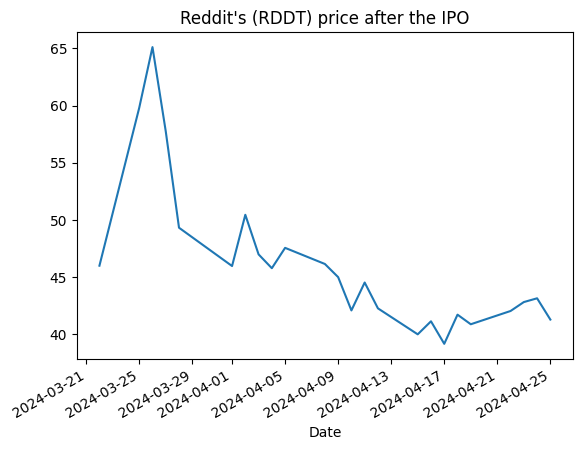

In [ ]:
reddit['Adj Close'].plot.line(title='Reddit\'s (RDDT) price after the IPO')

# Q3

In [80]:
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

LARGEST_STOCKS = US_STOCKS + EU_STOCKS + INDIA_STOCKS

In [86]:
NEW_US = ['TSLA','WMT','XOM','UNH','MA','PG','JNJ','MRK','HD','COST','ORCL']

NEW_EU = ['PRX.AS','CDI.PA','AIR.PA','SU.PA','ETN','SNY','BUD','DTE.DE','ALV.DE','MDT','AI.PA','EL.PA']

NEW_INDIA = ['BAJFINANCE.NS','MARUTI.NS','HCLTECH.NS','TATAMOTORS.NS','SUNPHARMA.NS','ONGC.NS','ADANIENT.NS','ADANIENT.NS','NTPC.NS','KOTAKBANK.NS','TITAN.NS']

LARGE_STOCKS = NEW_EU + NEW_US + NEW_INDIA

In [81]:

LARGEST_STOCKS

['MSFT',
 'AAPL',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM',
 'NVO',
 'MC.PA',
 'ASML',
 'RMS.PA',
 'OR.PA',
 'SAP',
 'ACN',
 'TTE',
 'SIE.DE',
 'IDEXY',
 'CDI.PA',
 'RELIANCE.NS',
 'TCS.NS',
 'HDB',
 'BHARTIARTL.NS',
 'IBN',
 'SBIN.NS',
 'LICI.NS',
 'INFY',
 'ITC.NS',
 'HINDUNILVR.NS',
 'LT.NS']

In [111]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(LARGEST_STOCKS):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                     start = '2013-12-20',
                     end = '2023-12-31',
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  # historyPrices['Year']= historyPrices.index.year
  # historyPrices['Month'] = historyPrices.index.month
  # historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  # for i in [1,3,7,30,90,365]:
  #   historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_7d'] = historyPrices['Adj Close'].shift(-7) / historyPrices['Adj Close']

  # Technical indicators
  # # SimpleMovingAverage 10 days and 20 days
  # historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  # historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  # historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  # historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  # historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_7d_future'] = np.where(historyPrices['growth_future_7d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

[*********************100%%**********************]  1 of 1 completed

0 MSFT


1 AAPL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

2 GOOG



[*********************100%%**********************]  1 of 1 completed

3 NVDA



[*********************100%%**********************]  1 of 1 completed

4 AMZN



[*********************100%%**********************]  1 of 1 completed

5 META



[*********************100%%**********************]  1 of 1 completed

6 BRK-B



[*********************100%%**********************]  1 of 1 completed

7 LLY



[*********************100%%**********************]  1 of 1 completed

8 AVGO



[*********************100%%**********************]  1 of 1 completed

9 V



[*********************100%%**********************]  1 of 1 completed

10 JPM


11 NVO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

12 MC.PA



[*********************100%%**********************]  1 of 1 completed

13 ASML



[*********************100%%**********************]  1 of 1 completed

14 RMS.PA



[*********************100%%**********************]  1 of 1 completed

15 OR.PA



[*********************100%%**********************]  1 of 1 completed

16 SAP



[*********************100%%**********************]  1 of 1 completed

17 ACN



[*********************100%%**********************]  1 of 1 completed

18 TTE



[*********************100%%**********************]  1 of 1 completed

19 SIE.DE



[*********************100%%**********************]  1 of 1 completed

20 IDEXY



[*********************100%%**********************]  1 of 1 completed

21 CDI.PA


22 RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

23 TCS.NS



[*********************100%%**********************]  1 of 1 completed

24 HDB



[*********************100%%**********************]  1 of 1 completed

25 BHARTIARTL.NS



[*********************100%%**********************]  1 of 1 completed

26 IBN



[*********************100%%**********************]  1 of 1 completed

27 SBIN.NS



[*********************100%%**********************]  1 of 1 completed

28 LICI.NS



[*********************100%%**********************]  1 of 1 completed

29 INFY



[*********************100%%**********************]  1 of 1 completed

30 ITC.NS



[*********************100%%**********************]  1 of 1 completed

31 HINDUNILVR.NS


32 LT.NS


[*********************100%%**********************]  1 of 1 completed


In [110]:
import time

large_stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(LARGE_STOCKS):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                     start = '2013-12-20',
                     end = '2023-12-31',
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  # historyPrices['Year']= historyPrices.index.year
  # historyPrices['Month'] = historyPrices.index.month
  # historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  # for i in [1,3,7,30,90,365]:
  #   historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_7d'] = historyPrices['Adj Close'].shift(-7) / historyPrices['Adj Close']

  # Technical indicators
  # # SimpleMovingAverage 10 days and 20 days
  # historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  # historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  # historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  # historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  # historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_7d_future'] = np.where(historyPrices['growth_future_7d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if large_stocks_df.empty:
    large_stocks_df = historyPrices
  else:
    large_stocks_df = pd.concat([large_stocks_df, historyPrices], ignore_index=True)

[*********************100%%**********************]  1 of 1 completed

0 PRX.AS



[*********************100%%**********************]  1 of 1 completed

1 CDI.PA



[*********************100%%**********************]  1 of 1 completed

2 AIR.PA



[*********************100%%**********************]  1 of 1 completed

3 SU.PA



[*********************100%%**********************]  1 of 1 completed

4 ETN



[*********************100%%**********************]  1 of 1 completed

5 SNY



[*********************100%%**********************]  1 of 1 completed

6 BUD



[*********************100%%**********************]  1 of 1 completed

7 DTE.DE



[*********************100%%**********************]  1 of 1 completed

8 ALV.DE



[*********************100%%**********************]  1 of 1 completed

9 MDT



[*********************100%%**********************]  1 of 1 completed

10 AI.PA



[*********************100%%**********************]  1 of 1 completed

11 EL.PA



[*********************100%%**********************]  1 of 1 completed

12 TSLA



[*********************100%%**********************]  1 of 1 completed

13 WMT



[*********************100%%**********************]  1 of 1 completed

14 XOM



[*********************100%%**********************]  1 of 1 completed

15 UNH



[*********************100%%**********************]  1 of 1 completed

16 MA



[*********************100%%**********************]  1 of 1 completed

17 PG



[*********************100%%**********************]  1 of 1 completed

18 JNJ



[*********************100%%**********************]  1 of 1 completed

19 MRK



[*********************100%%**********************]  1 of 1 completed

20 HD



[*********************100%%**********************]  1 of 1 completed

21 COST



[*********************100%%**********************]  1 of 1 completed

22 ORCL



[*********************100%%**********************]  1 of 1 completed

23 BAJFINANCE.NS



[*********************100%%**********************]  1 of 1 completed

24 MARUTI.NS



[*********************100%%**********************]  1 of 1 completed

25 HCLTECH.NS



[*********************100%%**********************]  1 of 1 completed

26 TATAMOTORS.NS



[*********************100%%**********************]  1 of 1 completed

27 SUNPHARMA.NS



[*********************100%%**********************]  1 of 1 completed

28 ONGC.NS



[*********************100%%**********************]  1 of 1 completed

29 ADANIENT.NS



[*********************100%%**********************]  1 of 1 completed

30 ADANIENT.NS



[*********************100%%**********************]  1 of 1 completed

31 NTPC.NS



[*********************100%%**********************]  1 of 1 completed

32 KOTAKBANK.NS



[*********************100%%**********************]  1 of 1 completed

33 TITAN.NS


In [126]:
large_stocks_df['Date'] = pd.to_datetime(large_stocks_df['Date'])
mean_growth_future_7d_large = large_stocks_df.groupby('Date')['growth_future_7d'].mean().reset_index()
mean_growth_future_7d_large['ticker_category'] = 'LARGE'
mean_growth_future_7d_large

,Date,growth_future_7d,ticker_category
0,2013-12-20,1.010689,LARGE
1,2013-12-23,0.997953,LARGE
2,2013-12-24,0.993475,LARGE
3,2013-12-26,0.994498,LARGE
4,2013-12-27,0.986869,LARGE
...,...,...,...
2597,2023-12-22,NaN,LARGE
2598,2023-12-26,NaN,LARGE
2599,2023-12-27,NaN,LARGE
2600,2023-12-28,NaN,LARGE


,Open,High,Low,Close,Adj Close_x,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
7011,37.349998,37.400002,37.099998,37.160000,31.233059,30632200.0,MSFT,2014,2014-01-01,3,...,0.964302,0.992998,0.970030,1.158676,NaN,NaN,NaN,NaN,NaN,NaN
7012,37.200001,37.220001,36.599998,36.910000,31.022930,31134800.0,MSFT,2014,2014-01-01,4,...,0.958139,0.984707,0.961500,1.143209,NaN,NaN,NaN,NaN,NaN,NaN
7013,36.849998,36.889999,36.110001,36.130001,30.367352,43603700.0,MSFT,2014,2014-01-01,0,...,0.953798,0.998223,0.968951,1.168236,NaN,NaN,NaN,NaN,NaN,NaN
7014,36.330002,36.490002,36.209999,36.410000,30.602673,35802800.0,MSFT,2014,2014-01-01,1,...,0.958653,0.993430,0.977598,1.097648,NaN,NaN,NaN,NaN,NaN,NaN
7015,36.000000,36.139999,35.580002,35.759998,30.056356,59971700.0,MSFT,2014,2014-01-01,2,...,0.955161,0.973383,0.974977,1.100781,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,3424.000000,3496.000000,3408.600098,3477.949951,3477.949951,1681707.0,LT.NS,2023,2023-12-01,4,...,1.064772,0.971018,0.939967,0.797881,1.002935,1.040865,1.049324,1.175398,1.655339,2.614201
5339,3477.949951,3508.350098,3477.949951,3490.050049,3490.050049,1072263.0,LT.NS,2023,2023-12-01,1,...,1.058217,0.982429,0.956014,0.801404,0.974945,0.972127,1.005911,1.134509,1.613511,2.513055
5340,3510.000000,3549.000000,3504.149902,3544.000000,3544.000000,1389266.0,LT.NS,2023,2023-12-01,2,...,1.040496,0.965806,0.943050,0.749506,1.021694,1.009920,0.995203,1.166121,1.607712,2.598696
5341,3545.000000,3559.949951,3500.500000,3518.050049,3518.050049,3371121.0,LT.NS,2023,2023-12-01,3,...,1.005645,0.965632,0.932881,0.730228,0.981240,0.977409,0.971705,1.126794,1.583988,2.575301


In [125]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
mean_growth_future_7d = stocks_df.groupby('Date')['growth_future_7d'].mean().reset_index()
mean_growth_future_7d['ticker_category']= 'LARGEST'
mean_growth_future_7d

,Date,growth_future_7d,ticker_category
0,2013-12-20,1.009511,LARGEST
1,2013-12-23,0.996177,LARGEST
2,2013-12-24,0.993353,LARGEST
3,2013-12-26,0.993635,LARGEST
4,2013-12-27,0.987148,LARGEST
...,...,...,...
2597,2023-12-22,NaN,LARGEST
2598,2023-12-26,NaN,LARGEST
2599,2023-12-27,NaN,LARGEST
2600,2023-12-28,NaN,LARGEST


In [136]:
both_stocks_df = pd.concat([mean_growth_future_7d_large, mean_growth_future_7d], ignore_index=False, axis =0)
mean_growth_future_7d_sorted=both_stocks_df.sort_values(by='Date')
# Filter the DataFrame to remove rows before '2014-01-01'
mean_growth_future_7d_filtered = mean_growth_future_7d_sorted[mean_growth_future_7d_sorted['Date'] >= '2014-01-01']
mean_growth_future_7d_filtered 




,Date,growth_future_7d,ticker_category
7,2014-01-01,0.967215,LARGEST
7,2014-01-01,0.976317,LARGE
8,2014-01-02,0.993122,LARGEST
8,2014-01-02,0.997588,LARGE
9,2014-01-03,0.999657,LARGEST
...,...,...,...
2599,2023-12-27,NaN,LARGE
2600,2023-12-28,NaN,LARGEST
2600,2023-12-28,NaN,LARGE
2601,2023-12-29,NaN,LARGE


In [142]:
# Group the DataFrame by 'Date' and 'ticker_category' and calculate the mean of 'growth_future_7d'
mean_growth_future_7d_grouped = mean_growth_future_7d_filtered.groupby(['Date', 'ticker_category'])['growth_future_7d'].mean().unstack()
mean_growth_future_7d_grouped
# Count the occurrences where 'LARGE' exceeds 'LARGEST'
days_large_gt_largest = (mean_growth_future_7d_grouped['LARGE'] > mean_growth_future_7d_grouped['LARGEST']).sum()

print("Number of days where 'LARGE' exceeds 'LARGEST':", days_large_gt_largest)

percentage = int(days_large_gt_largest/2595 *100)
print(f'Percentage = {percentage}%')


Number of days where 'LARGE' exceeds 'LARGEST': 1228
Percentage = 47%


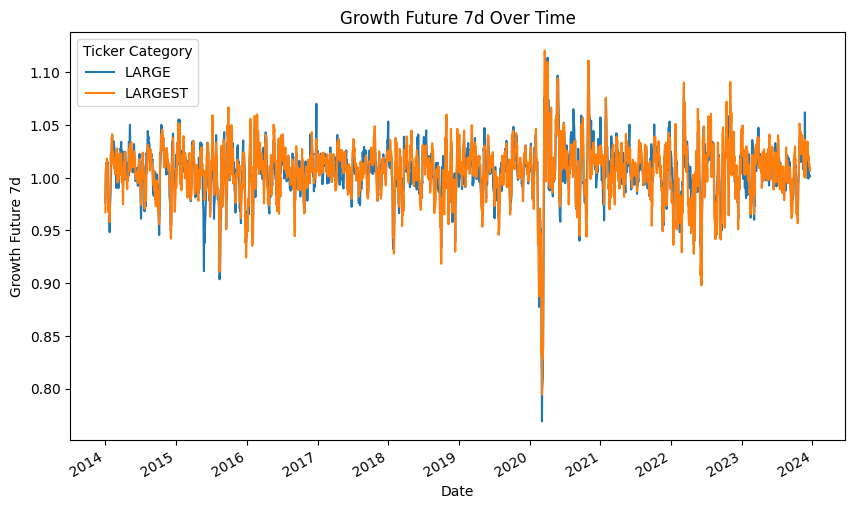

In [132]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Date' and 'ticker_category' and calculate the mean of 'growth_future_7d'
mean_growth_future_7d_grouped = mean_growth_future_7d_filtered.groupby(['Date', 'ticker_category'])['growth_future_7d'].mean().unstack()

# Plot the time series graph
mean_growth_future_7d_grouped.plot(figsize=(10, 6))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Growth Future 7d')
plt.title('Growth Future 7d Over Time')

# Add legend
plt.legend(title='Ticker Category')

# Show the plot
plt.show()

# Q4

In [153]:
import pyarrow.parquet as pq

# Specify the path to your Parquet file
file_path = 'stocks_df_combined_trunc_2014_2023.parquet.brotli'

# Read the Parquet file
table = pq.read_table(file_path)

# Convert the table to a Pandas DataFrame if needed
df = table.to_pandas()

df

,Open,High,Low,Close,Adj Close_x,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
7011,37.349998,37.400002,37.099998,37.160000,31.233059,30632200.0,MSFT,2014,2014-01-01,3,...,0.964302,0.992998,0.970030,1.158676,NaN,NaN,NaN,NaN,NaN,NaN
7012,37.200001,37.220001,36.599998,36.910000,31.022930,31134800.0,MSFT,2014,2014-01-01,4,...,0.958139,0.984707,0.961500,1.143209,NaN,NaN,NaN,NaN,NaN,NaN
7013,36.849998,36.889999,36.110001,36.130001,30.367352,43603700.0,MSFT,2014,2014-01-01,0,...,0.953798,0.998223,0.968951,1.168236,NaN,NaN,NaN,NaN,NaN,NaN
7014,36.330002,36.490002,36.209999,36.410000,30.602673,35802800.0,MSFT,2014,2014-01-01,1,...,0.958653,0.993430,0.977598,1.097648,NaN,NaN,NaN,NaN,NaN,NaN
7015,36.000000,36.139999,35.580002,35.759998,30.056356,59971700.0,MSFT,2014,2014-01-01,2,...,0.955161,0.973383,0.974977,1.100781,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,3424.000000,3496.000000,3408.600098,3477.949951,3477.949951,1681707.0,LT.NS,2023,2023-12-01,4,...,1.064772,0.971018,0.939967,0.797881,1.002935,1.040865,1.049324,1.175398,1.655339,2.614201
5339,3477.949951,3508.350098,3477.949951,3490.050049,3490.050049,1072263.0,LT.NS,2023,2023-12-01,1,...,1.058217,0.982429,0.956014,0.801404,0.974945,0.972127,1.005911,1.134509,1.613511,2.513055
5340,3510.000000,3549.000000,3504.149902,3544.000000,3544.000000,1389266.0,LT.NS,2023,2023-12-01,2,...,1.040496,0.965806,0.943050,0.749506,1.021694,1.009920,0.995203,1.166121,1.607712,2.598696
5341,3545.000000,3559.949951,3500.500000,3518.050049,3518.050049,3371121.0,LT.NS,2023,2023-12-01,3,...,1.005645,0.965632,0.932881,0.730228,0.981240,0.977409,0.971705,1.126794,1.583988,2.575301


Indicator groups: https://github.com/TA-Lib/ta-lib-python/blob/master/README.md

* Overlap Studies (17)
* Momentum Indicators (30+)
* Volume Indicators (3)
* Cycle Indicators (5)
* Price Transform (4)
* Volatility Indicators (3)
* Pattern Recognition (60)

In [145]:
# https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
# Update (apr 2023): Colab is now Python 3.10
# there are some other (older) ways to install talib

# url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
# !curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
# url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
# !curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

## 6.1) Momentum indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md

In [158]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index <dateTime, ticker>
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

    #   'adx': talib_momentum_adx,
    #   'adxr': talib_momentum_adxr,
    #   'apo': talib_momentum_apo,
    #   'aroon_1': talib_momentum_aroon[0] ,
    #   'aroon_2': talib_momentum_aroon[1],
    #   'aroonosc': talib_momentum_aroonosc,
    #   'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
    #   'cmo': talib_momentum_cmo,
    #   'dx': talib_momentum_dx,
    #   'macd': talib_momentum_macd,
    #   'macdsignal': talib_momentum_macdsignal,
    #   'macdhist': talib_momentum_macdhist,
    #   'macd_ext': talib_momentum_macd_ext,
    #   'macdsignal_ext': talib_momentum_macdsignal_ext,
    #   'macdhist_ext': talib_momentum_macdhist_ext,
    #   'macd_fix': talib_momentum_macd_fix,
    #   'macdsignal_fix': talib_momentum_macdsignal_fix,
    #   'macdhist_fix': talib_momentum_macdhist_fix,
    #   'mfi': talib_momentum_mfi,
    #   'minus_di': talib_momentum_minus_di,
    #   'mom': talib_momentum_mom,
    #   'plus_di': talib_momentum_plus_di,
    #   'dm': talib_momentum_plus_dm,
    #   'ppo': talib_momentum_ppo,
    #   'roc': talib_momentum_roc,
    #   'rocp': talib_momentum_rocp,
    #   'rocr': talib_momentum_rocr,
    #   'rocr100': talib_momentum_rocr100,
    #   'rsi': talib_momentum_rsi,
    #   'slowk': talib_momentum_slowk,
    #   'slowd': talib_momentum_slowd,
    #   'fastk': talib_momentum_fastk,
    #   'fastd': talib_momentum_fastd,
    #   'fastk_rsi': talib_momentum_fastk_rsi,
    #   'fastd_rsi': talib_momentum_fastd_rsi,
    #   'trix': talib_momentum_trix,
    #   'ultosc': talib_momentum_ultosc,
    #   'willr': talib_momentum_willr,
        'open': df['Open'],
        'adjclose':df['Close']
     }
  )
  return momentum_df

In [178]:
data  = talib_get_momentum_indicators_for_one_ticker(df)

In [218]:
import pandas as pd
# data.index = pd.to_datetime(data.index)
# Assuming 'data' is your DataFrame containing the CCI values and other necessary columns
# Filter for Fridays
fridays_data = data[data['Date'].dt.dayofweek == 4]

# Filter for CCI > 200
high_cci_data = fridays_data[fridays_data['cci'] > 200]
high_cci_data
# # Calculate the number of trades
# num_trades = len(high_cci_data)

# Initialize gross profit
gross_profit = 0

# Iterate through each trade
for index, trade in high_cci_data.iterrows():
    try:# Invest $1000
        investment = 1000
        print(f'Index = {index}')
        print(trade['Date'])
        tickerinvolved = trade['Ticker']
        index = int(index)
        newindex = index+5
        # print(newindex)
        print(trade)
        
        # Calculate profit/loss after 5 days
        future_date_index= newindex
        print(future_date_index)
        print()
        # print(data['Date'])


        newdata = data.loc[newindex]
    
        newdata = newdata[newdata['Ticker']==tickerinvolved]
        print(newdata)
        adjclose_value = newdata.loc[newindex, 'adjclose']
        # futureprice  = newdata.iloc[newindex, 'adjclose']
        print(f"Futureprice = {adjclose_value}")

        profit = (adjclose_value - trade['open']) * investment / trade['open']

        print(f'PROFIT = {profit}')
        gross_profit += profit
    except KeyError:  
        pass

#     if newdata:
#         tick_data = data[data['Ticker'] == trade['Ticker']]
#         # print(trade['Ticker'])
        
#         future_price = data.loc[tick_data, 'adjclose']
#         print(future_price)
#         profit = (future_price - trade['adjclose']) * investment / trade['adjclose']
#         gross_profit += profit
#     else:
#         print('oh no')

# # Convert gross profit to thousands and round to the nearest integer
print(f'GROSS PROFIT = {gross_profit}')
gross_profit_thousands = round(gross_profit / 1000)

print("Expected gross profit over 10 years (in thousands $):", gross_profit_thousands)

Index = 7113
2014-05-30 00:00:00
Date        2014-05-30 00:00:00
Ticker                     MSFT
cci                  203.518798
open                  40.450001
adjclose              40.939999
Name: 7113, dtype: object
7118

           Date Ticker         cci   open  adjclose
7118 2014-06-06   MSFT  192.611211  41.48     41.48
Futureprice = 41.47999954223633
PROFIT = 25.46350457032788
Index = 7181
2014-09-05 00:00:00
Date        2014-09-05 00:00:00
Ticker                     MSFT
cci                   257.01333
open                  45.110001
adjclose                  45.91
Name: 7181, dtype: object
7186

           Date Ticker         cci   open   adjclose
7186 2014-09-12   MSFT  101.585057  46.91  46.700001
Futureprice = 46.70000076293945
PROFIT = 35.24717648137268
Index = 7340
2015-04-24 00:00:00
Date        2015-04-24 00:00:00
Ticker                     MSFT
cci                  340.009871
open                      45.66
adjclose              47.869999
Name: 7340, dtype: object
734